In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

df= pd.read_csv('/Users/bhavyapandey/Downloads/data.csv',encoding='unicode_escape')
df['Payment_Method'] = np.random.choice(['Credit Card', 'Debit Card', 'Cash', 'Apple Pay'], size=len(df))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Payment_Method
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Debit Card
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Cash
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Credit Card
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Apple Pay
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Cash
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Credit Card
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Credit Card
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Credit Card
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Cash


### Tasks

### 1. Data Processing:

In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       541909 non-null  object 
 1   StockCode       541909 non-null  object 
 2   Description     540455 non-null  object 
 3   Quantity        541909 non-null  int64  
 4   InvoiceDate     541909 non-null  object 
 5   UnitPrice       541909 non-null  float64
 6   CustomerID      406829 non-null  float64
 7   Country         541909 non-null  object 
 8   Payment_Method  541909 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 37.2+ MB


In [4]:
df.isnull().sum()

InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        135080
Country                0
Payment_Method         0
dtype: int64

In [5]:
df.dropna(inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Payment_Method
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Debit Card
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Cash
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Credit Card
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Apple Pay
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Cash
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Credit Card
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Credit Card
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Credit Card
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Cash


In [6]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
Payment_Method    0
dtype: int64

In [7]:
import numpy as np

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].apply(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       406829 non-null  object        
 1   StockCode       406829 non-null  object        
 2   Description     406829 non-null  object        
 3   Quantity        406829 non-null  int64         
 4   InvoiceDate     406829 non-null  datetime64[ns]
 5   UnitPrice       406829 non-null  float64       
 6   CustomerID      406829 non-null  int64         
 7   Country         406829 non-null  object        
 8   Payment_Method  406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 31.0+ MB


In [8]:
df = df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Payment_Method
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Debit Card
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Cash
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Credit Card
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Apple Pay
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Cash
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,Credit Card
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,Credit Card
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,Credit Card
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,Cash


### 2. RFM Calculations:

In [9]:
# Recent purchase date
# InvoiceDay to datetime
df_copy = df.copy()
df_copy['InvoiceDay'] = df_copy['InvoiceDate'].dt.date
rfm = df_copy.groupby('CustomerID')['InvoiceDay'].max().reset_index()
rfm['InvoiceDay'] = pd.to_datetime(rfm['InvoiceDay'])

# Extract day
most_recent_date = rfm['InvoiceDay'].max()

# days since the last purchase
rfm['Days_Since_Last_Purchase'] = (most_recent_date - rfm['InvoiceDay']).dt.days

# Remove InvoiceDay column
rfm = rfm.drop(columns=['InvoiceDay'])

# Total  transactions
total_transactions = df_copy.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Total products
total_products_purchased = df_copy.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge
rfm = pd.merge(rfm, total_products_purchased, on='CustomerID', how='left')
rfm = pd.merge(rfm, total_transactions, on='CustomerID')

rfm

,CustomerID,Days_Since_Last_Purchase,Total_Products_Purchased,Total_Transactions
0,12346,325,0,2
1,12347,2,2458,7
2,12348,75,2341,4
3,12349,18,631,1
4,12350,310,197,1
...,...,...,...,...
4367,18280,277,45,1
4368,18281,180,54,1
4369,18282,7,98,3
4370,18283,3,1389,16


In [10]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the rfm dataframe
rfm = pd.merge(rfm, total_spend, on='CustomerID')
rfm = pd.merge(rfm, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

rfm


,CustomerID,Days_Since_Last_Purchase,Total_Products_Purchased,Total_Transactions,Total_Spend,Average_Transaction_Value
0,12346,325,0,2,0.00,0.000000
1,12347,2,2458,7,4310.00,615.714286
2,12348,75,2341,4,1797.24,449.310000
3,12349,18,631,1,1757.55,1757.550000
4,12350,310,197,1,334.40,334.400000
...,...,...,...,...,...,...
4367,18280,277,45,1,180.60,180.600000
4368,18281,180,54,1,80.82,80.820000
4369,18282,7,98,3,176.60,58.866667
4370,18283,3,1389,16,2083.20,130.200000


### 3. RFM Segmentation:

In [11]:
#  most recent purchase date 
most_recent_date = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

#  most recent purchase
most_recent_date['Days_Since_Last_Purchase'] = (most_recent_date['InvoiceDate'].max() - most_recent_date['InvoiceDate']).dt.days

# quartiles for Days_Since_Last_Purchase
recency_quartiles = most_recent_date['Days_Since_Last_Purchase'].quantile([0.25, 0.5, 0.75])

# Recency Scores (lower is better)
most_recent_date['Recency_Score'] = pd.qcut(most_recent_date['Days_Since_Last_Purchase'], q=4, labels=[4, 3, 2, 1])

# Frequency Scores (higher is better)
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)
most_recent_date = most_recent_date.merge(total_transactions, on='CustomerID')

most_recent_date['Frequency_Rank'] = most_recent_date['Total_Transactions'].rank(method='first')
most_recent_date['Frequency_Score'] = pd.qcut(most_recent_date['Frequency_Rank'], q=4, labels=[1, 2, 3, 4])

# Monetary Scores (higher is better)
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()
most_recent_date = most_recent_date.merge(total_spend, on='CustomerID')
most_recent_date['Monetary_Score'] = pd.qcut(most_recent_date['Total_Spend'], q=4, labels=[1, 2, 3, 4])

# Create the RFM Score 
most_recent_date['RFM_Score'] = most_recent_date['Recency_Score'].astype(str) + most_recent_date['Frequency_Score'].astype(str) + most_recent_date['Monetary_Score'].astype(str)

# Merge 
rfm = pd.merge(rfm, most_recent_date[['CustomerID', 'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'RFM_Score']], on='CustomerID', how='left')

rfm


,CustomerID,Days_Since_Last_Purchase,Total_Products_Purchased,Total_Transactions,Total_Spend,Average_Transaction_Value,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,12346,325,0,2,0.00,0.000000,1,2,1,121
1,12347,2,2458,7,4310.00,615.714286,4,4,4,444
2,12348,75,2341,4,1797.24,449.310000,2,3,4,234
3,12349,18,631,1,1757.55,1757.550000,3,1,4,314
4,12350,310,197,1,334.40,334.400000,1,1,2,112
...,...,...,...,...,...,...,...,...,...,...
4367,18280,277,45,1,180.60,180.600000,1,2,1,121
4368,18281,180,54,1,80.82,80.820000,1,2,1,121
4369,18282,7,98,3,176.60,58.866667,4,3,1,431
4370,18283,3,1389,16,2083.20,130.200000,4,4,4,444


### 4. Customer Segmentation:

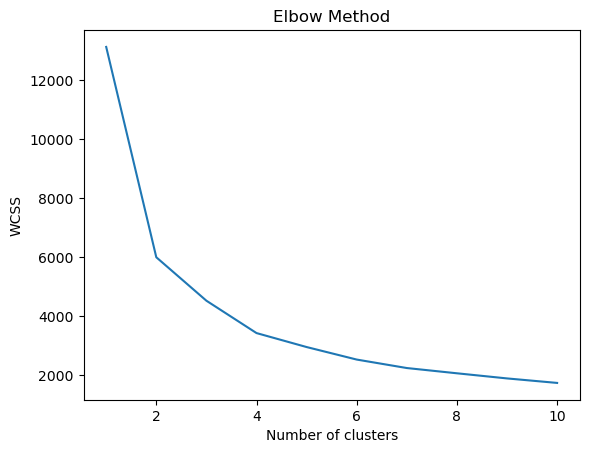

,CustomerID,Days_Since_Last_Purchase,Total_Products_Purchased,Total_Transactions,Total_Spend,Average_Transaction_Value,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Cluster
0,12346,325,0,2,0.00,0.000000,1,2,1,121,3
1,12347,2,2458,7,4310.00,615.714286,4,4,4,444,1
2,12348,75,2341,4,1797.24,449.310000,2,3,4,234,0
3,12349,18,631,1,1757.55,1757.550000,3,1,4,314,2
4,12350,310,197,1,334.40,334.400000,1,1,2,112,3
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,277,45,1,180.60,180.600000,1,2,1,121,3
4368,18281,180,54,1,80.82,80.820000,1,2,1,121,3
4369,18282,7,98,3,176.60,58.866667,4,3,1,431,2
4370,18283,3,1389,16,2083.20,130.200000,4,4,4,444,1


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency_Score', 'Frequency_Score', 'Monetary_Score']])
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

k = 4 

kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(rfm_scaled)

rfm['Cluster'] = kmeans.labels_
rfm

### 5. Segment Profiling:

In [13]:
print("Segment 0 Recommendations:")
print("1. Offer exclusive loyalty program to encourage purchases and increase frequency.")
print("2. Send personalized product recommendations based on searching patterns and previous purchase with special offers to tempt them back.")
print("3. Run email or SMS campaigns to keep them connected with the brand.")
print("\n")

print("Segment 1 Recommendations:")
print("1. Recognize and reward their loyalty with member points or exclusive access to new products and events.")
print("2. Suggest complementary products to increase their order value.")
print("3. Ask for their feedback on products purchased and services to further tailor your offerings.")
print("\n")

print("Segment 2 Recommendations:")
print("1. Recommend higher-value products or bundles to increase their spend.")
print("2. Create promotions for limited-time offers to pull them to make more frequent purchases.")
print("3. Share content that shows the benefits of your products to boost their value.")
print("\n")

print("Segment 3 Recommendations:")
print("1. Send targeted campaigns with attracting offers.")
print("2. Identify the reasons for their non-purchase and develop strategies to win them back.")
print("3. Ask for feedback and work on improving the aspects that pushed them away from purchasing.")
print("\n")

Segment 0 Recommendations:
1. Offer exclusive loyalty program to encourage purchases and increase frequency.
2. Send personalized product recommendations based on searching patterns and previous purchase with special offers to tempt them back.
3. Run email or SMS campaigns to keep them connected with the brand.


Segment 1 Recommendations:
1. Recognize and reward their loyalty with member points or exclusive access to new products and events.
2. Suggest complementary products to increase their order value.
3. Ask for their feedback on products purchased and services to further tailor your offerings.


Segment 2 Recommendations:
1. Recommend higher-value products or bundles to increase their spend.
2. Create promotions for limited-time offers to pull them to make more frequent purchases.
3. Share content that shows the benefits of your products to boost their value.


Segment 3 Recommendations:
1. Send targeted campaigns with attracting offers.
2. Identify the reasons for their non-purc

### 6. Marketing Recommendations:

In [14]:
# marketing recommendations for each customer segment
marketing_recommendations = {
    'High-Value Customers': {
        'Retention': 'Focus on retaining these customers through loyalty programs and exclusive offers.',
        'Upsell': 'Identify complementary products and offer bundle deals to increase sales.',
    },
    'Potential High-Value Customers': {
        'Promotions': 'Offer incentives to encourage additional purchases and discounts on related products.',
        'Personalization': 'Use purchase history for personalized product recommendations.',
    },
    'Low-Frequency, High-Value Customers': {
        'Win-Back Campaigns': 'Target inactive customers with special promotions to reactivate them.',
        'Subscription Models': 'Introduce subscription services to ensure steady revenue.',
    },
    'Low-Value Customers': {
        'Customer Education': 'Provide informative content to help customers understand product value.',
        'Reactivation Campaigns': 'Create reactivation campaigns with exclusive offers.',
    }
}

# recommendations based on customer cluster
def get_recommendations(cluster):
    if cluster in marketing_recommendations:
        return marketing_recommendations[cluster]
    else:
        return {'General Recommendations': 'Collect customer feedback and conduct A/B testing for optimization.'}

# Apply recommendations 
rfm['Marketing_Recommendations'] = rfm['Cluster'].apply(get_recommendations)

rfm[['CustomerID', 'Cluster', 'Marketing_Recommendations']]


,CustomerID,Cluster,Marketing_Recommendations
0,12346,3,{'General Recommendations': 'Collect customer ...
1,12347,1,{'General Recommendations': 'Collect customer ...
2,12348,0,{'General Recommendations': 'Collect customer ...
3,12349,2,{'General Recommendations': 'Collect customer ...
4,12350,3,{'General Recommendations': 'Collect customer ...
...,...,...,...
4367,18280,3,{'General Recommendations': 'Collect customer ...
4368,18281,3,{'General Recommendations': 'Collect customer ...
4369,18282,2,{'General Recommendations': 'Collect customer ...
4370,18283,1,{'General Recommendations': 'Collect customer ...


### 7. Visualization:

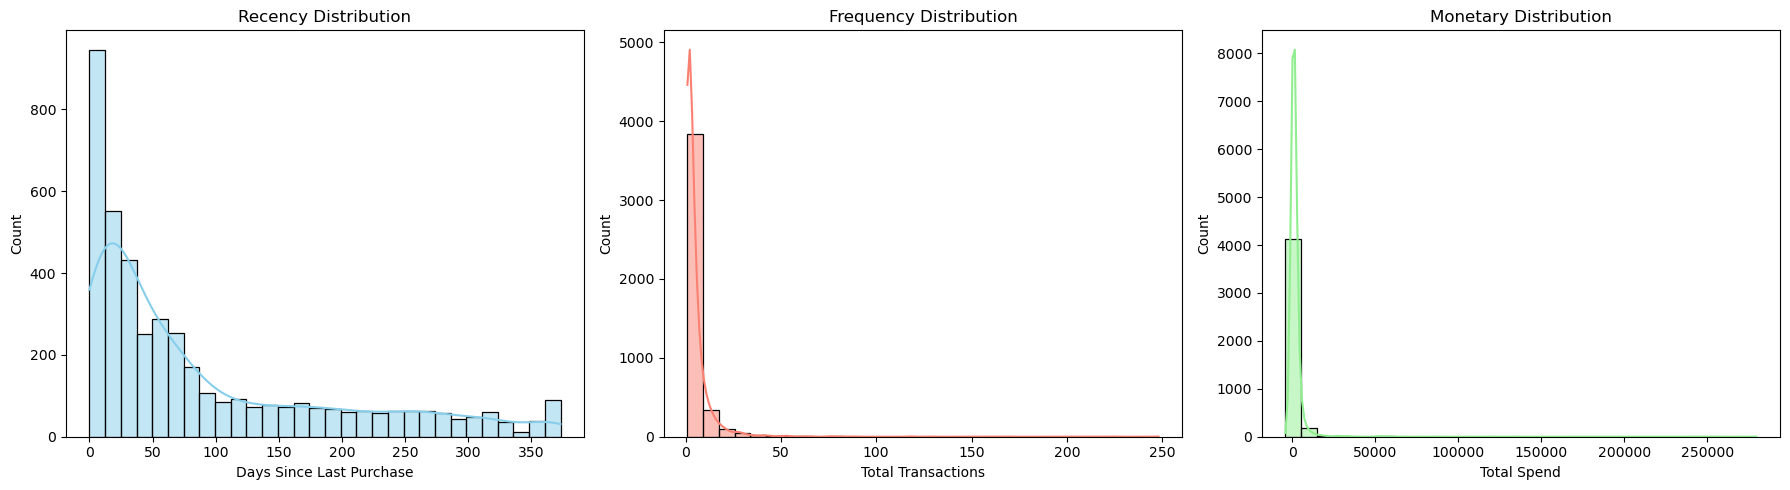

,Cluster,Average_Recency,Average_Products_Purchased,Average_Transactions,Average_Spend,Average_Transaction_Value,Customer_Count
0,0,120.704370,907.787918,4.465296,1499.002226,417.942321,778
1,1,15.990614,2678.155235,10.993502,4600.818441,367.968519,1385
2,2,23.021951,288.065854,1.952439,428.730695,257.186524,820
3,3,191.115911,181.038877,1.359971,290.673233,240.344015,1389


In [15]:
plt.figure(figsize=(18, 5))

# Recency distribution
plt.subplot(131)
sns.histplot(rfm['Days_Since_Last_Purchase'], bins=30, kde=True, color='skyblue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')

# Frequency distribution
plt.subplot(132)
sns.histplot(rfm['Total_Transactions'], bins=30, kde=True, color='salmon')
plt.title('Frequency Distribution')
plt.xlabel('Total Transactions')

# Monetary distribution
plt.subplot(133)
sns.histplot(rfm['Total_Spend'], bins=30, kde=True, color='lightgreen')
plt.title('Monetary Distribution')
plt.xlabel('Total Spend')

plt.tight_layout()
plt.show()

# Group customers by their assigned clusters
cs = rfm.groupby('Cluster').agg({
    'Days_Since_Last_Purchase': 'mean',
    'Total_Products_Purchased': 'mean',
    'Total_Transactions': 'mean',
    'Total_Spend': 'mean',
    'Average_Transaction_Value': 'mean',
    'CustomerID': 'count'  
}).reset_index()

# Rename columns for clarity
cs = cs.rename(columns={
    'Days_Since_Last_Purchase': 'Average_Recency',
    'Total_Products_Purchased': 'Average_Products_Purchased',
    'Total_Transactions': 'Average_Transactions',
    'Total_Spend': 'Average_Spend',
    'Average_Transaction_Value': 'Average_Transaction_Value',
    'CustomerID': 'Customer_Count'
})

cs

### Find the solutions to these questions:

### 1. Data Overview

In [16]:
# Size of the dataset 
num_rows, num_columns = df.shape
print(f"Size of the dataset: {num_rows} rows and {num_columns} columns")
print("\n")

# Description of each column
column_descriptions = df.describe(include='all', datetime_is_numeric=True)
print("Column Descriptions:")
print(column_descriptions)
print("\n")

# Time period covered by the dataset
start_date = df['InvoiceDate'].min()
end_date = df['InvoiceDate'].max()
print(f"Time period covered by the dataset: From {start_date} to {end_date}")

Size of the dataset: 405440 rows and 10 columns


Column Descriptions:
       InvoiceNo StockCode                         Description       Quantity  \
count     405440    405440                              405440  405440.000000   
unique     22190      3684                                3896            NaN   
top       576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq         542      2073                                2066            NaN   
mean         NaN       NaN                                 NaN      12.093481   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       2.000000   
50%          NaN       NaN                                 NaN       5.000000   
75%          NaN       NaN                                 NaN      12.000000   
max          NaN       NaN                                 NaN   80995.000000   
std          NaN       NaN            

### 2. Customer Analysis

Number of unique customers: 4372
Distribution of orders per customer:
17841    7928
14911    5903
14096    5128
12748    4598
14606    2778
         ... 
17331       1
18113       1
13391       1
16138       1
17846       1
Name: CustomerID, Length: 4372, dtype: int64


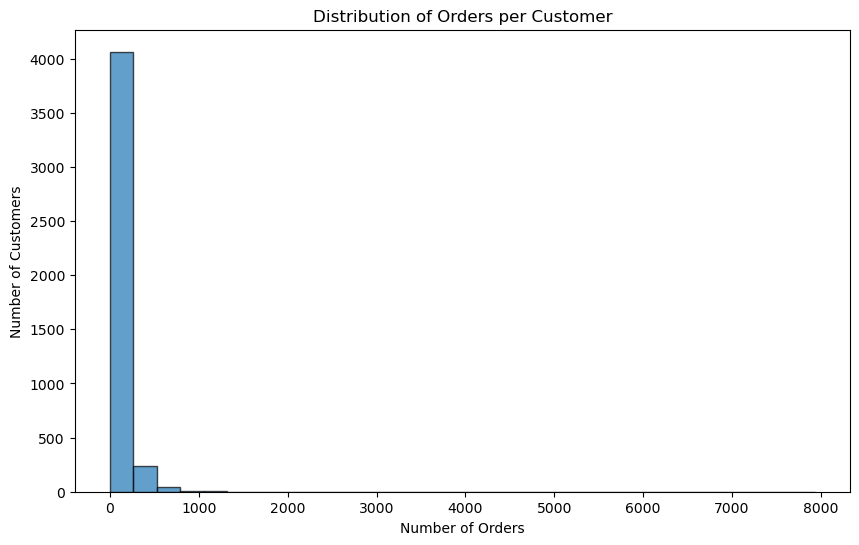

Top 5 customers with the most purchases by order count:
17841    7928
14911    5903
14096    5128
12748    4598
14606    2778
Name: CustomerID, dtype: int64


In [17]:

# Unique Customers
unique_customers = df['CustomerID'].nunique()
print(f"Number of unique customers: {unique_customers}")

# Distribution of the number of orders per customer
orders_per_customer = df['CustomerID'].value_counts()
print("Distribution of orders per customer:")
print(orders_per_customer)

plt.figure(figsize=(10, 6))
plt.hist(orders_per_customer, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

# Top 5 customers with the most purchases by order count
top_customers = orders_per_customer.head(5)
print("Top 5 customers with the most purchases by order count:")
print(top_customers)


### 3. Product Analysis

WHITE HANGING HEART T-LIGHT HOLDER    2066
REGENCY CAKESTAND 3 TIER              1902
JUMBO BAG RED RETROSPOT               1661
ASSORTED COLOUR BIRD ORNAMENT         1414
PARTY BUNTING                         1413
LUNCH BAG RED RETROSPOT               1354
SET OF 3 CAKE TINS PANTRY DESIGN      1229
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1122
PACK OF 72 RETROSPOT CAKE CASES       1075
Name: Description, dtype: int64




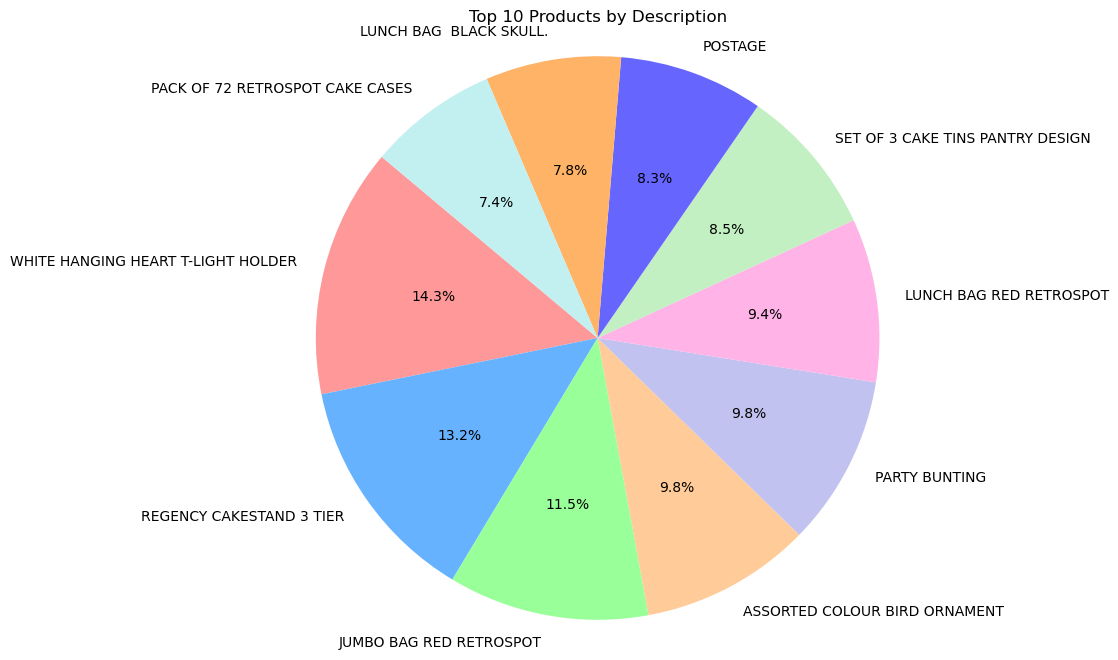

Average Price of Products: 3.463690864246252


StockCode with the Highest Revenue: REGENCY CAKESTAND 3 TIER
Total Revenue: 132707.94999999998




In [18]:
# top 10 most frequently purchased products
df['Total_Spend'] = df['UnitPrice']*df['Quantity']

product_counts = df['Description'].value_counts()
top_10_products = product_counts.head(10)
print(top_10_products)
print("\n")
product_quantity = df.groupby('Description')['Quantity'].sum()

plt.figure(figsize=(8, 8))
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#6666ff', '#ffb366', '#c2f0f0']
plt.pie(top_10_products, labels=top_10_products.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.axis('equal')  
plt.title('Top 10 Products by Description')

plt.show()

# average price of products
average_price = df['UnitPrice'].mean()
print("Average Price of Products:", average_price)
print("\n")

# the total revenue for each category
product_revenue = df.groupby('Description')['Total_Spend'].sum()
highest_revenue_stock = product_revenue.idxmax()
highest_revenue = product_revenue.max()
print("StockCode with the Highest Revenue:", highest_revenue_stock)
print("Total Revenue:", highest_revenue)
print("\n")

### 4. Time Analysis

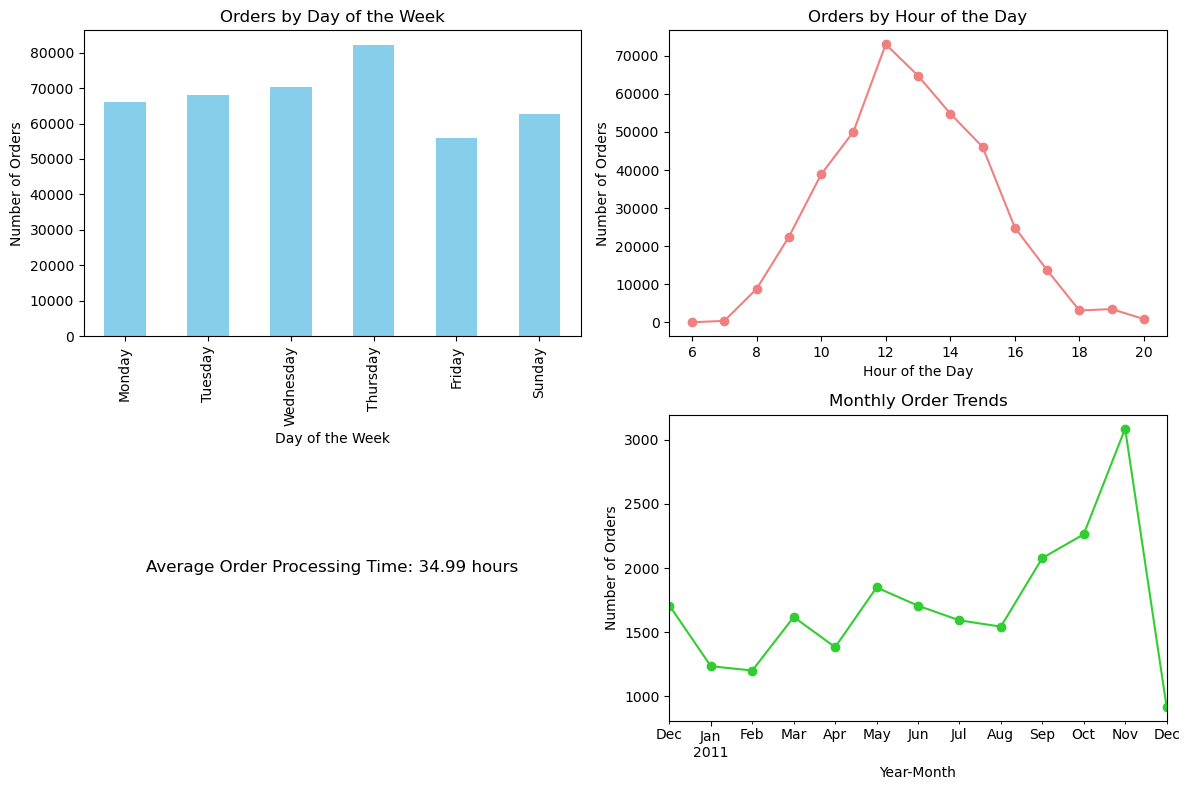

In [19]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['OrderDay'] = df['InvoiceDate'].dt.date
df['OrderTime'] = df['InvoiceDate'].dt.time
df['OrderHour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  

orders_by_day_of_week = df['DayOfWeek'].value_counts().sort_index()
orders_by_hour = df['OrderHour'].value_counts().sort_index()

# Average order processing time
df['OrderProcessTime'] = (df['InvoiceDate'] - df.groupby('CustomerID')['InvoiceDate'].shift(1)).dt.total_seconds() / 3600
average_process_time = df['OrderProcessTime'].mean()

#seasonal trends (monthly) in the dataset
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_order_count = df.groupby('YearMonth')['InvoiceNo'].nunique()

plt.figure(figsize=(12, 8))

#day of the week with the most orders
plt.subplot(221)
orders_by_day_of_week.plot(kind='bar', color='skyblue')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

# hour of the day with the most orders
plt.subplot(222)
orders_by_hour.plot(kind='line', marker='o', color='lightcoral')
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')

# Display the average order processing time
plt.subplot(223)
plt.text(0.5, 0.5, f'Average Order Processing Time: {average_process_time:.2f} hours',
         fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.axis('off')

# Plot seasonal trends (monthly)
plt.subplot(224)
monthly_order_count.plot(kind='line', marker='o', color='limegreen')
plt.title('Monthly Order Trends')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')

plt.tight_layout()


day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

orders_by_day_of_week.index = orders_by_day_of_week.index.map(day_mapping)
plt.subplot(221)
orders_by_day_of_week.plot(kind='bar', color='skyblue')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()


### 5.Geographical Analysis

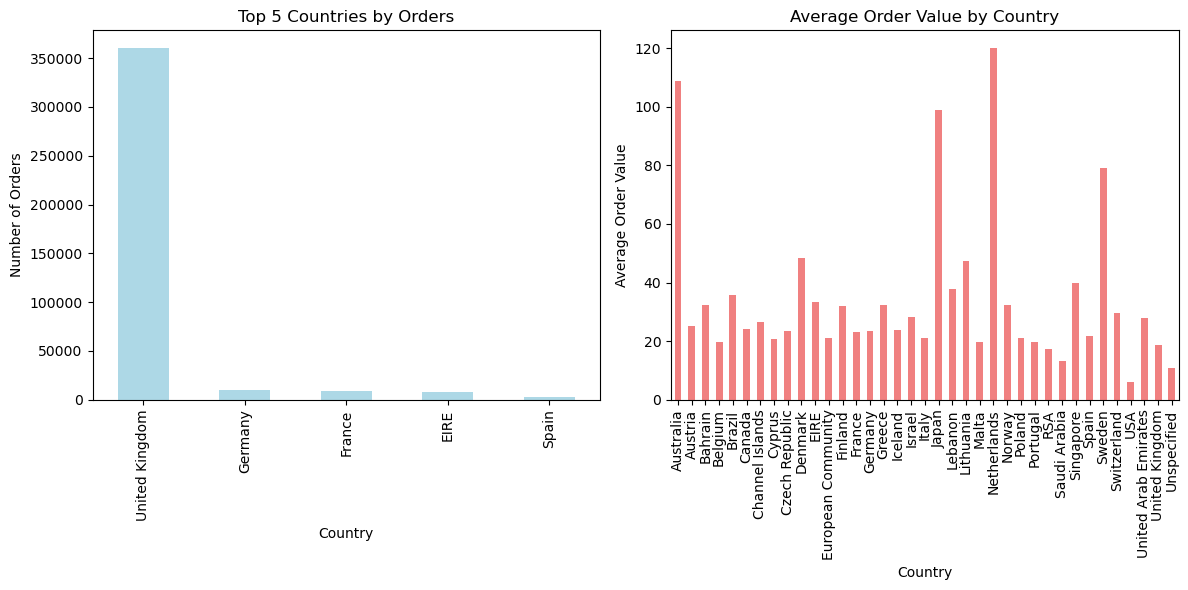

Correlation between Country and Average Order Value:
nan


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

oc = df['Country'].value_counts()
avgc = df.groupby('Country')['Total_Spend'].mean()
t5 = oc.head(5)

correlation = avgc.corr(df['Country'])

plt.figure(figsize=(12, 6))

plt.subplot(121)
t5.plot(kind='bar', color='lightblue')
plt.title('Top 5 Countries by Orders')
plt.xlabel('Country')
plt.ylabel('Number of Orders')

plt.subplot(122)
avgc.plot(kind='bar', color='lightcoral')
plt.title('Average Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')

plt.tight_layout()
plt.show()

print(f'Correlation between Country and Average Order Value:\n{correlation}')

### 6. Payment Analysis

In [25]:
payment_method_counts = df['Payment_Method'].value_counts()

# Display the most common payment methods
print("Most Common Payment Methods:")
print(payment_method_counts)


Most Common Payment Methods:
Debit Card     101658
Credit Card    101415
Apple Pay      101236
Cash           101131
Name: Payment_Method, dtype: int64


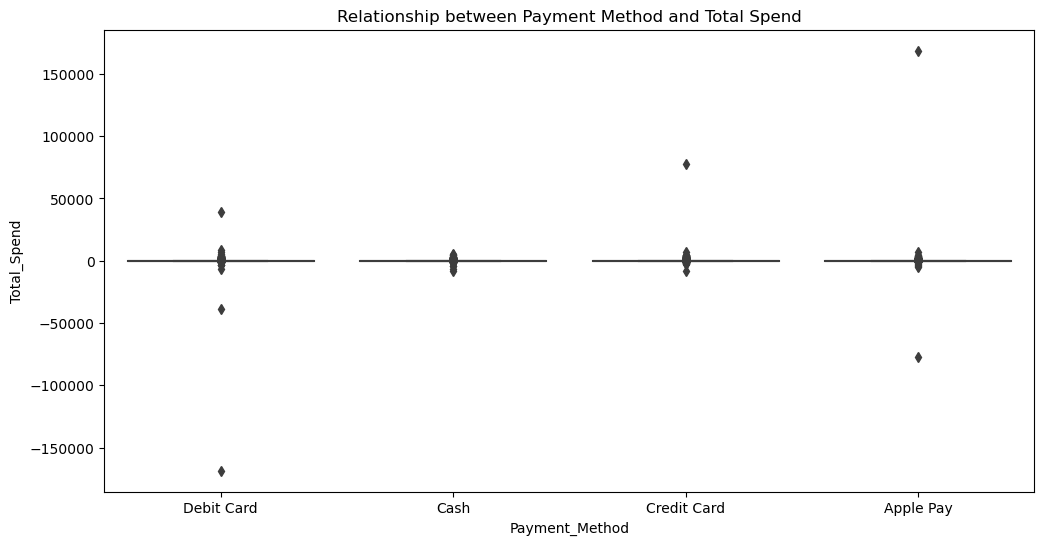

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Payment_Method', y='Total_Spend', data=df)
plt.title('Relationship between Payment Method and Total Spend')
plt.show()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Payment_Method,Total_Spend,OrderDay,OrderTime,OrderHour,DayOfWeek,OrderProcessTime,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Debit Card,15.30,2010-12-01,08:26:00,8,2,NaN,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Cash,20.34,2010-12-01,08:26:00,8,2,0.0,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Credit Card,22.00,2010-12-01,08:26:00,8,2,0.0,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Apple Pay,20.34,2010-12-01,08:26:00,8,2,0.0,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Cash,20.34,2010-12-01,08:26:00,8,2,0.0,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,Credit Card,10.20,2011-12-09,12:50:00,12,4,0.0,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,Credit Card,12.60,2011-12-09,12:50:00,12,4,0.0,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,Credit Card,16.60,2011-12-09,12:50:00,12,4,0.0,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,Cash,16.60,2011-12-09,12:50:00,12,4,0.0,2011-12


### 7. Customer Behavior

In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
customer_activity = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])

#average duration of customer activity
customer_activity['ActivityDuration'] = (customer_activity['max'] - customer_activity['min']).dt.days.mean()

print(f'Average Duration of Customer Activity: {customer_activity["ActivityDuration"].mean()} days')

#recency and frequency 
recency = (customer_activity['max'].max() - customer_activity['max']).dt.days
frequency = df['CustomerID'].value_counts()
customer_segments = pd.DataFrame({'Recency': recency, 'Frequency': frequency})

# segment thresholds 
recency_threshold = customer_segments['Recency'].median()
frequency_threshold = customer_segments['Frequency'].median()

# Assign segments 
customer_segments['Segment'] = 'Low Activity'
customer_segments.loc[(customer_segments['Recency'] <= recency_threshold) & (customer_segments['Frequency'] > frequency_threshold), 'Segment'] = 'High Activity'

print('Customer Segments:')
print(customer_segments)


Average Duration of Customer Activity: 133.38586459286367 days
Customer Segments:
       Recency  Frequency        Segment
12346      325          2   Low Activity
12347        1        182  High Activity
12348       74         31   Low Activity
12349       18         73  High Activity
12350      309         17   Low Activity
...        ...        ...            ...
18280      277         10   Low Activity
18281      180          7   Low Activity
18282        7         13   Low Activity
18283        3        748  High Activity
18287       42         70  High Activity

[4372 rows x 3 columns]


### 8. Returns and Refunds

In [23]:
returns = df[df['Quantity'] < 0]

# percentage of returns or refunds
total_orders = len(df)
orr = len(returns)
pr = (orr / total_orders) * 100

print(f'Percentage of Orders with Returns or Refunds: {pr:.2f}%')
# Group the returns by product category
rc = returns.groupby('Description')['InvoiceNo'].count()
toc = df.groupby('Description')['InvoiceNo'].count()

# percentage of returns for each category
prc = (rc / toc) * 100

print('Percentage of Returns by Product Category:')
print(prc)


Percentage of Orders with Returns or Refunds: 2.19%
Percentage of Returns by Product Category:
Description
 4 PURPLE FLOCK DINNER CANDLES            NaN
 50'S CHRISTMAS GIFT BAG LARGE       0.909091
 DOLLY GIRL BEAKER                   1.428571
 I LOVE LONDON MINI BACKPACK              NaN
 I LOVE LONDON MINI RUCKSACK              NaN
                                      ...    
ZINC T-LIGHT HOLDER STARS SMALL      1.244813
ZINC TOP  2 DOOR WOODEN SHELF       18.181818
ZINC WILLIE WINKIE  CANDLE STICK     0.518135
ZINC WIRE KITCHEN ORGANISER               NaN
ZINC WIRE SWEETHEART LETTER TRAY          NaN
Name: InvoiceNo, Length: 3896, dtype: float64


### 9. Profitability Analysis

In [24]:
# df['TR'] = df['Quantity'] * (df['UnitPrice'])
total_profit = df['Total_Spend'].sum()

print("Total Profit Generated: ${:.2f}".format(total_profit))

df['Revenue'] = (df['Quantity'] * df['UnitPrice'])

top_5_products_profit_margin = df[['StockCode', 'Description', 'Revenue']].sort_values(by='Revenue', ascending=False).head(5)

print("\nTop 5 Products with the Highest Revenue:")
print(top_5_products_profit_margin)


Total Profit Generated: $8293661.56

Top 5 Products with the Highest Revenue:
       StockCode                          Description    Revenue
540421     23843          PAPER CRAFT , LITTLE BIRDIE  168469.60
61619      23166       MEDIUM CERAMIC TOP STORAGE JAR   77183.60
222680     22502       PICNIC BASKET WICKER 60 PIECES   38970.00
173382      POST                              POSTAGE    8142.75
348325     23243  SET OF TEA COFFEE SUGAR TINS PANTRY    7144.72


### 10. Customer Satisfaction

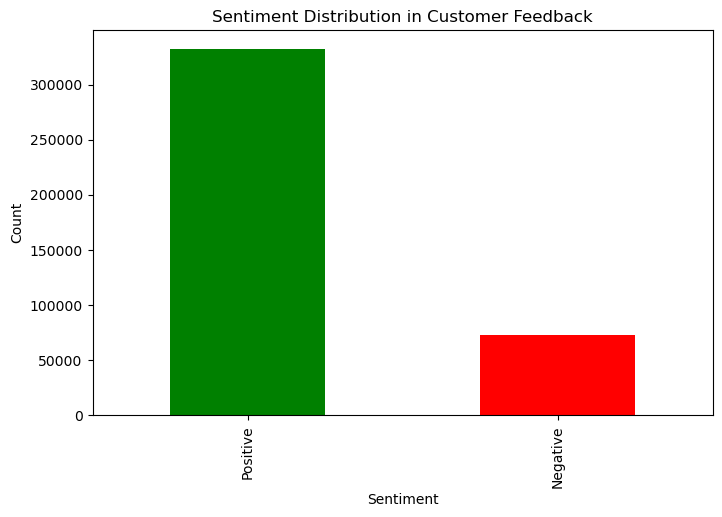

In [34]:
keywords = ['positive', 'negative', 'good', 'bad', 'like', 'dislike', 'excellent', 'poor', 'satisfied', 'unsatisfied']

positive_probabilities = [0.4, 0.1, 0.3, 0.05, 0.2, 0.05, 0.3, 0.05, 0.4, 0.1]
positive_probabilities /= np.sum(positive_probabilities)  # Normalize to ensure probabilities sum to 1

np.random.seed(42)  
df['Customer_Feedback'] = np.random.choice(keywords, len(df), p=positive_probabilities)


def analyze_sentiment(keyword):
    positive_keywords = ['positive', 'good', 'like', 'excellent', 'satisfied']
    negative_keywords = ['negative', 'bad', 'dislike', 'poor', 'unsatisfied']
    
    if keyword in positive_keywords:
        return 'Positive'
    elif keyword in negative_keywords:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Customer_Feedback'].apply(analyze_sentiment)

sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in Customer Feedback')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


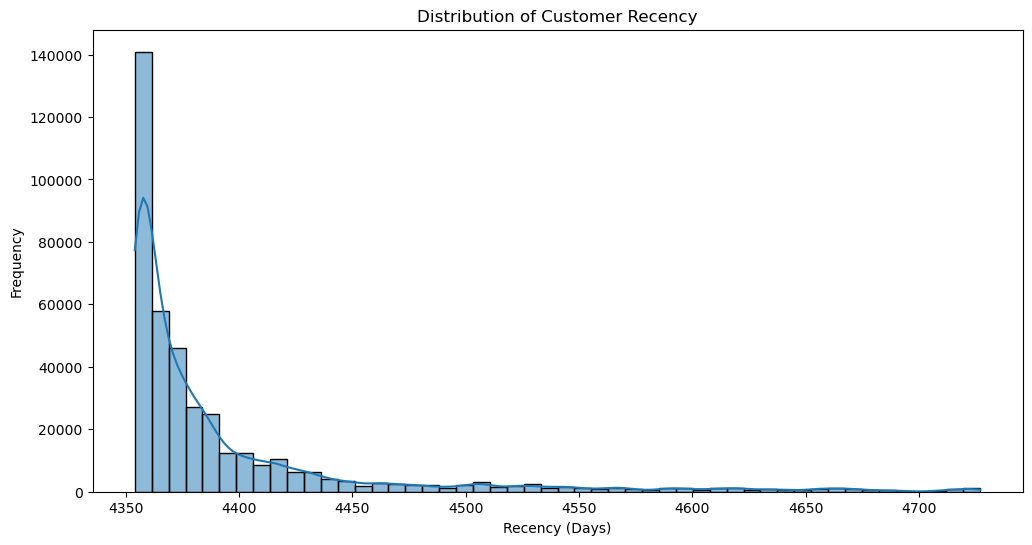

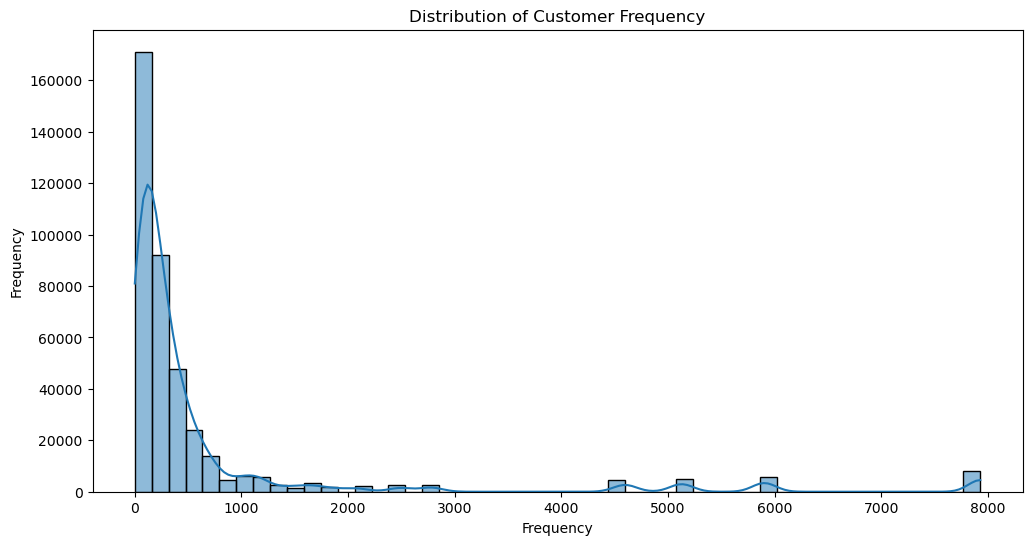

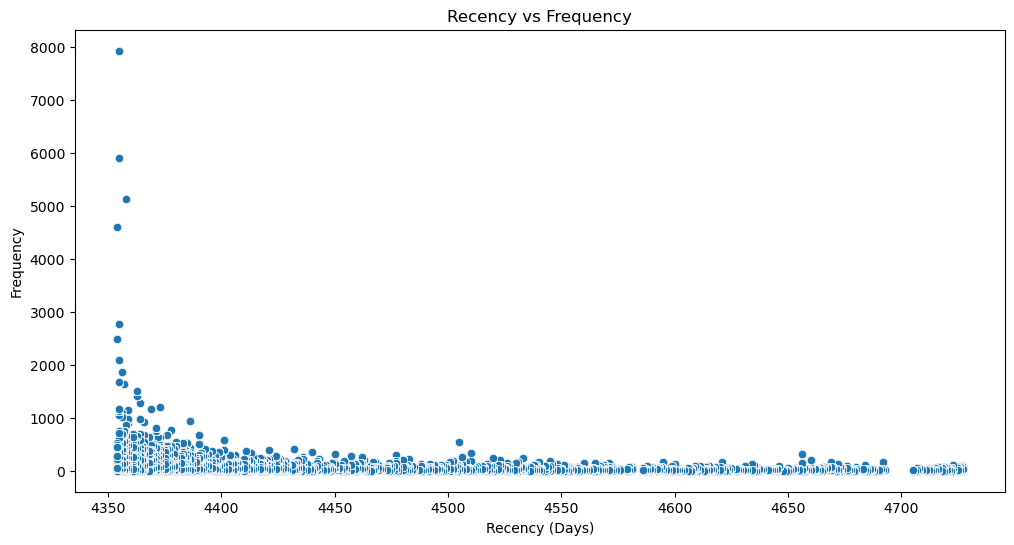

In [39]:
from datetime import datetime, timedelta

current_date = datetime(2023, 11, 11)
df['Recency'] = (current_date - df.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days
df['Frequency'] = df.groupby('CustomerID')['InvoiceDate'].transform('count')

plt.figure(figsize=(12, 6))
sns.histplot(df['Recency'], bins=50, kde=True)
plt.title('Distribution of Customer Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Frequency'], bins=50, kde=True)
plt.title('Distribution of Customer Frequency')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Recency', y='Frequency', data=df)
plt.title('Recency vs Frequency')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.show()